In [ ]:
print("GPS indoor/outdoor classification - visualization")

GPS indoor/outdoor classification - visualization


In [ ]:
# 12 features + 1 class
import pandas as pd


cols = ['number','snrtotal','snrave','numtotal','elesnrtotal','elesnrave','snr20num','snr15num','gpsz_tmean','gpsz_stdz','tenTotal','R','Class']
cols_update = ['snrave','numtotal','elesnrtotal','elesnrave','snr15num','gpsz_tmean', 'tenTotal','R','Class']
cols_update = ['number','snrtotal','snrave','numtotal','elesnrtotal','elesnrave','snr20num','snr15num','gpsz_tmean','tenTotal','R','Class']
cols_update = cols

# train
# sparse
dataxy1 = pd.read_csv("./traindatafromDataset3.csv", names=cols) # (24398, 13)  17142 in + 7256 out
# no zero, filtered based on dataxy1
dataxy2 = pd.read_csv("./traindata_NoZero.csv", names=cols) # (16225, 13) 9014 in + 7211 out
#dataxy2 = preprocess(dataxy2)
print( dataxy1.shape, dataxy2.shape )

# test
# sparse
dataxy3 = pd.read_csv("./testdatafromDataset4.csv")
# no zero
dataxy4 = pd.read_csv("./testdata_NoZero.csv", names=cols)
print( dataxy3.shape, dataxy4.shape )


#
dataxy_sub01 = pd.read_csv("./test01.csv") # "地铁室外跑"
dataxy_sub02 = pd.read_csv("./test02.csv") # 地铁站大棚
dataxy_sub03 = pd.read_csv("./test03.csv") # 楼梯电梯地下地铁站口
dataxy_sub04 = pd.read_csv("./test04.csv") # 地铁场景的数据
dataxy_sub05 = pd.read_csv("./test05.csv") # "主流场景"
print(dataxy_sub01.shape, dataxy_sub02.shape, dataxy_sub03.shape, dataxy_sub04.shape, dataxy_sub05.shape)


dataxy_sub00 = pd.concat([dataxy_sub02, dataxy_sub03, dataxy_sub04, dataxy_sub05])
print(dataxy_sub00.shape)

log_dataxy01 = pd.read_csv("./log_data01.csv") 
log_dataxy01.shape

log_dataxy02 = pd.read_csv("./log_data02.csv") 
log_dataxy02.shape

log_dataxy03 = pd.read_csv("./log_data03.csv") 
log_dataxy03.shape

#log_dataxy04 = pd.read_csv("./log_data04.csv") 
#log_dataxy04.shape

(24398, 13) (16225, 13)
(3592, 13) (2650, 13)
(963, 13) (1119, 13) (1920, 13) (5092, 13) (21546, 13)
(29677, 13)


(26422, 13)

In [ ]:
log_dataxy01.cov()
log_dataxy03.corr()
dataxy_sub00.corr()

,number,snrtotal,snrave,numtotal,elesnrtotal,elesnrave,snr20num,snr15num,gpsz_tmean,gpsz_stdz,tenTotal,R
number,1.000000,0.840792,0.679410,0.835438,0.846865,0.715145,0.816911,0.833811,-0.019349,-0.218626,0.696232,-0.516601
snrtotal,0.840792,1.000000,0.863693,0.959434,0.987417,0.837757,0.982175,0.977978,-0.066203,-0.241559,0.715240,-0.517192
snrave,0.679410,0.863693,1.000000,0.747793,0.862742,0.779092,0.866135,0.820122,-0.083362,-0.202558,0.493776,-0.276603
numtotal,0.835438,0.959434,0.747793,1.000000,0.944237,0.772673,0.934312,0.978739,-0.066901,-0.268775,0.761341,-0.572643
elesnrtotal,0.846865,0.987417,0.862742,0.944237,1.000000,0.888184,0.971484,0.965851,-0.103110,-0.217719,0.723587,-0.533451
elesnrave,0.715145,0.837757,0.779092,0.772673,0.888184,1.000000,0.828809,0.816321,-0.229665,-0.064311,0.617965,-0.533061
snr20num,0.816911,0.982175,0.866135,0.934312,0.971484,0.828809,1.000000,0.972675,-0.059635,-0.229968,0.689368,-0.492427
snr15num,0.833811,0.977978,0.820122,0.978739,0.965851,0.816321,0.972675,1.000000,-0.069901,-0.246711,0.734299,-0.544009
gpsz_tmean,-0.019349,-0.066203,-0.083362,-0.066901,-0.103110,-0.229665,-0.059635,-0.069901,1.000000,-0.073662,-0.067185,0.108256
gpsz_stdz,-0.218626,-0.241559,-0.202558,-0.268775,-0.217719,-0.064311,-0.229968,-0.246711,-0.073662,1.000000,-0.269419,0.047970


In [ ]:
from sklearn.utils import shuffle

def convert_to_int(dataxy_tmp, mode=0):
  tmp = dataxy_tmp.copy()
  if mode == 0:
    #
    tmp['snrtotal'] = tmp['snrtotal'] + 0.5
    tmp['snrtotal'] = tmp['snrtotal'].astype(int)
    #
    tmp['snrave'] = tmp['snrave'] + 0.5
    tmp['snrave'] = tmp['snrave'].astype(int)
    #
    tmp['elesnrtotal'] = tmp['elesnrtotal'] + 0.5
    tmp['elesnrtotal'] = tmp['elesnrtotal'].astype(int)
    #
    tmp['elesnrave'] = tmp['elesnrave'] + 0.5
    tmp['elesnrave'] = tmp['elesnrave'].astype(int)
    #
    tmp['tenTotal'] = tmp['tenTotal'] * 1000
    tmp['tenTotal'] = tmp['tenTotal'].astype(int)
    #
    tmp['R'] = tmp['R'] + 0.5
    tmp['R'] = tmp['R'].astype(int)
  #
  tmp['gpsz_tmean'] = tmp['gpsz_tmean'] + 0.5
  tmp['gpsz_tmean'] = tmp['gpsz_tmean'].astype(int)
  #
  tmp['gpsz_stdz'] = tmp['gpsz_stdz']
  tmp['gpsz_stdz'] = tmp['gpsz_stdz'].astype(int)
  #
  return shuffle(tmp, random_state=0)

dataxy_sub05
log_dataxy01
dataxy2

convert_to_int(dataxy_sub05)
convert_to_int(dataxy2)
convert_to_int(log_dataxy01, 1)

,number,snrtotal,snrave,numtotal,elesnrtotal,elesnrave,snr20num,snr15num,gpsz_tmean,gpsz_stdz,tenTotal,R,Class
15458,9,163,18,26,5900,656,3,8,10,2,250,10,outdoor
15175,5,38,8,5,2280,456,0,1,102,4,28,48,outdoor
9132,10,217,22,55,9600,960,5,8,3,2,222,6,outdoor
10435,12,348,29,64,13360,1113,11,12,20,19,250,4,outdoor
3249,7,191,27,18,8158,1165,7,7,14,3,250,2,outdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,10,293,29,15,9465,947,10,10,5,0,278,4,outdoor
13123,11,310,28,38,9731,885,11,11,1,0,250,11,outdoor
9845,12,270,23,57,10315,860,8,10,6,0,222,4,outdoor
10799,8,231,29,10,9165,1146,8,8,9,1,194,4,outdoor


In [ ]:
#
convert_to_int(dataxy2)
convert_to_int(dataxy_sub05)
convert_to_int(log_dataxy01, 1)

cols_update = cols
cols_update = ['snrave','numtotal','elesnrave','gpsz_tmean','gpsz_stdz','R','Class']

# split data as: features + labels
def split_xy(dataxy_tmp, cols_update):
  dataxy = dataxy_tmp.copy() # dataxy2 # dataxy_all[:16000]

  X = dataxy[cols_update[:-1]]
  y = dataxy[cols_update[-1]]
  print( X.shape, y.shape )
  return X, y

def log_evaluate(y_log_test, y_log_pred):
  s = len(y_log_test)
  yt = {0:0, 1:0}
  for v in y_log_test:
    if v == 0:
      yt[0] = yt[0] + 1
    else:
      yt[1] = yt[1] + 1
  print("predict by wifi: ")
  print("0: ", yt[0], round(yt[0]/s, 2), "\t 1: ", yt[1], round(yt[1]/s, 2))
  #
  yp = {0:0, 1:0}
  for v in y_log_pred:
    if v == 0:
      yp[0] = yp[0] + 1
    else:
      yp[1] = yp[1] + 1
  print("predict by model: ")
  print("0: ", yp[0], round(yp[0]/s, 2), "\t 1: ", yp[1], round(yp[1]/s, 2))
  #
  c = 0
  c0 = 0
  c1 = 0
  i = 0
  while i<s:
    if y_log_test[i] == y_log_pred[i]:
      c = c + 1
      if y_log_test[i] == 0:
        c0 = c0 + 1
      else:
        c1 = c1 + 1
    i = i + 1
  print("overlap by wifi & model: ")
  print("0 & 1: ", c, round(c/s, 2))
  print("0: ", c0, round(c0/s, 2), "\t 1: ", c1, round(c1/s, 2))
  return yt, yp, c

# original model - random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


tmp = convert_to_int(dataxy_sub05)
tn = 15000
X_train, y_train = split_xy(tmp[:tn], cols_update)
X_test, y_test = split_xy(tmp[tn:], cols_update)
le = LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

tmp = convert_to_int(log_dataxy03, 1)
X_log_test, y_log_test = split_xy(tmp, cols_update)
y_log_test = le.transform(y_log_test) 

#
# searching for the optimal parameters
f = False
#f = True
if f:
  mn = []
  for ne in range(2, 16):
    for md in range(2, 7):
      for rs in range(10):
        forest = RandomForestClassifier(n_estimators=ne, random_state=rs, max_depth=md)
        forest.fit(X_train, y_train)
        d1, d2 = forest.score(X_train, y_train), forest.score(X_test, y_test)
        d = abs(d1 - d2)
        print(round(d, 3), round(d1, 3), round(d2, 3), ne, md, rs)
        mn.append( (round(d, 3), round(d1, 3), round(d2, 3), ne, md, rs) )
  mn = sorted(mn, key=lambda x:x[2], reverse=True)
  print(mn[:5]) # top 5
# (0.001, 0.993, 0.992, 6, 6, 7), (0.002, 0.994, 0.992, 7, 6, 7), (0.003, 0.995, 0.992, 8, 6, 4), (0.001, 0.993, 0.992, 9, 6, 3), (0.002, 0.994, 0.992, 9, 6, 7)
# (0.001, 0.993, 0.993, 8, 6, 9), (0.002, 0.994, 0.993, 9, 6, 6), (0.002, 0.994, 0.993, 11, 6, 1), (0.001, 0.994, 0.993, 11, 6, 6), (0.001, 0.994, 0.993, 14, 6, 1)
# (0.0, 0.994, 0.995, 7, 6, 3), (0.0, 0.994, 0.995, 11, 6, 3), (0.0, 0.995, 0.995, 12, 6, 3), (0.002, 0.992, 0.994, 5, 6, 6), (0.0, 0.994, 0.994, 6, 6, 3)

# random forest
forest = RandomForestClassifier(n_estimators=11, random_state=3, max_depth=6)
forest.fit(X_train, y_train)
d1, d2 = forest.score(X_train, y_train), forest.score(X_test, y_test)
print("training: ", d1, "\ttesting: ", d2)

#
y_log_pred = forest.predict(X_log_test)
yt, yp, c = log_evaluate(y_log_test, y_log_pred)

(15000, 6) (15000,)
(6546, 6) (6546,)
0:  ['indoor']
1:  ['outdoor']
(26422, 6) (26422,)
training:  0.9944 	testing:  0.9945004582951421
predict by wifi: 
0:  2754 0.1 	 1:  23668 0.9
predict by model: 
0:  6508 0.25 	 1:  19914 0.75
overlap by wifi & model: 
0 & 1:  18884 0.71
0:  862 0.03 	 1:  18022 0.68


In [ ]:
#
tmp = convert_to_int(dataxy_sub05)
tn = 15000
X_train, y_train = split_xy(tmp[:tn], cols_update)
X_test, y_test = split_xy(tmp[tn:], cols_update)
le = LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

#
tmp = convert_to_int(log_dataxy03, 1)
X_log_test, y_log_test = split_xy(tmp, cols_update)
y_log_test = le.transform(y_log_test) 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def train_LR(X_train, y_train, X_test, y_test, f=False, mi=700, cw=None):
  log_reg = LogisticRegression(penalty='l2', solver='sag',max_iter=mi, class_weight=cw)
                        # solver参数决定了我们对逻辑回归损失函数的优化方法: liblinear, lbfgs, newton-cg, sag
  log_reg.fit(X_train, y_train)
  X = X_train
  if f:
    X = StandardScaler().fit_transform(X)
  acc0 = log_reg.score(X, y_train)
  print("training accuracy: ", acc0)
  acc1 = log_reg.score(X_test, y_test)
  print("tesing accuracy: ", acc1)
  return log_reg, acc0, acc1

f = False
# searching
search_flag = False
#search_flag = True
if search_flag:
  mn = [] 
  for mi in range(300, 1050, 50):
    for w in range(10, 91, 1):
      cw = {0:w/100, 1:(100-w)/100}
      log_reg, acc0, acc1 = train_LR(X_train, y_train, X_test, y_test, f, mi, cw)
      print(mi, cw, acc0, acc1)
      mn.append( (mi, w, acc0, acc1) )
  mn = sorted(mn, key=lambda x:x[3], reverse=True)
  print(mn[:5])
# (950, 57, 0.9652666666666667, 0.9671555148182096), (1000, 57, 0.9652666666666667, 0.9671555148182096), (1000, 58, 0.9651333333333333, 0.9670027497708524), (1000, 61, 0.9649333333333333, 0.9670027497708524), (750, 56, 0.965, 0.9668499847234953)

mi = 950
cw = {0:0.57, 1:0.43}
log_reg, acc0, acc1 = train_LR(X_train, y_train, X_test, y_test, f, mi, cw)
#
y_log_pred = log_reg.predict(X_log_test)
yt, yp, c = log_evaluate(y_log_test, y_log_pred)

(15000, 6) (15000,)
(6546, 6) (6546,)
0:  ['indoor']
1:  ['outdoor']
(26422, 6) (26422,)
training accuracy:  0.9652666666666667
tesing accuracy:  0.9671555148182096
predict by wifi: 
0:  2754 0.1 	 1:  23668 0.9
predict by model: 
0:  3707 0.14 	 1:  22715 0.86
overlap by wifi & model: 
0 & 1:  21133 0.8
0:  586 0.02 	 1:  20547 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
#
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(X_train, y_train, X_test, y_test, mi=660, cw=None, dg=2):
    lr, acc0, acc1 = train_LR(X_train, y_train, X_test, y_test, False, mi, cw)
    return Pipeline([
        ('poly', PolynomialFeatures(degree=dg)),
        # ('std_scaler', StandardScaler()),
        ('log_reg', lr)
    ])

# training, testing data
tmp = convert_to_int(dataxy_sub05)
tn = 15000
X_train, y_train = split_xy(tmp[:tn], cols_update)
X_test, y_test = split_xy(tmp[tn:], cols_update)
le = LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

#
tmp = convert_to_int(log_dataxy02, 1)
X_log_test, y_log_test = split_xy(tmp, cols_update)
y_log_test = le.transform(y_log_test) 

search_flag = False
#search_flag = True
if search_flag:
  mn = []
  for mi in range(500, 1000, 20):
    for w in range(30, 81, 1):
      cw = {0:w/100, 1:(100-w)/100}
      for dg in range(1, 3):
        poly_log_reg = PolynomialLogisticRegression(X_train, y_train, X_test, y_test, mi, cw, dg)
        poly_log_reg.fit(X_train, y_train)
        train_acc, test_acc = poly_log_reg.score(X_train, y_train), poly_log_reg.score(X_test, y_test)
        print(mi, cw, dg, train_acc, test_acc)
        mn.append( (mi, cw, dg, train_acc, test_acc) )
  mn = sorted(mn, key=lambda x:x[4], reverse=True)
  print(mn[:5])
# (760, {0: 0.56, 1: 0.44}, 1, 0.9650666666666666, 0.9668499847234953), (720, {0: 0.56, 1: 0.44}, 1, 0.9652666666666667, 0.9666972196761381), (740, {0: 0.56, 1: 0.44}, 1, 0.9649333333333333, 0.9666972196761381), (800, {0: 0.59, 1: 0.41}, 1, 0.9651333333333333, 0.9666972196761381), (700, {0: 0.56, 1: 0.44}, 1, 0.9652666666666667, 0.9665444546287809)




(15000, 6) (15000,)
(6546, 6) (6546,)
0:  ['indoor']
1:  ['outdoor']
(12586, 6) (12586,)
[(760, {0: 0.56, 1: 0.44}, 1, 0.9650666666666666, 0.9668499847234953), (720, {0: 0.56, 1: 0.44}, 1, 0.9652666666666667, 0.9666972196761381), (740, {0: 0.56, 1: 0.44}, 1, 0.9649333333333333, 0.9666972196761381), (800, {0: 0.59, 1: 0.41}, 1, 0.9651333333333333, 0.9666972196761381), (700, {0: 0.56, 1: 0.44}, 1, 0.9652666666666667, 0.9665444546287809)]


In [ ]:
#


# training, testing data
tmp = convert_to_int(dataxy_sub05)
tn = 15000
X_train, y_train = split_xy(tmp[:tn], cols_update)
X_test, y_test = split_xy(tmp[tn:], cols_update)
le = LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

#
tmp = convert_to_int(log_dataxy03, 1)
X_log_test, y_log_test = split_xy(tmp, cols_update)
y_log_test = le.transform(y_log_test) 
#

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

clf = LinearSVC(loss='hinge', C=20.0, class_weight={0:0.57, 1:0.43}, random_state=4)  # 1, 4, 5
#clf = SVC(kernel='rbf', C=1, probability=False)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), clf.score(X_test, y_test))
y_log_pred = clf.predict(X_log_test)


yt, yp, c = log_evaluate(y_log_test, y_log_pred)

(15000, 6) (15000,)
(6546, 6) (6546,)
0:  ['indoor']
1:  ['outdoor']
(26422, 6) (26422,)
0.8412 0.845096241979835
predict by wifi: 
0:  2754 0.1 	 1:  23668 0.9
predict by model: 
0:  5477 0.21 	 1:  20945 0.79
overlap by wifi & model: 
0 & 1:  19823 0.75
0:  816 0.03 	 1:  19007 0.72


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#
from sklearn.svm import NuSVC

# training, testing data
tmp = convert_to_int(dataxy_sub05)
tn = 15000
X_train, y_train = split_xy(tmp[:tn], cols_update)
X_test, y_test = split_xy(tmp[tn:], cols_update)
le = LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

#
tmp = convert_to_int(log_dataxy03, 1)
X_log_test, y_log_test = split_xy(tmp, cols_update)
y_log_test = le.transform(y_log_test) 
#

clf = NuSVC(nu=0.56, kernel='poly') # nu=80-88, -> 84, 85, 86
clf.fit(X_train, y_train)
tr_acc, te_acc = clf.score(X_train, y_train), clf.score(X_test, y_test)
print(tr_acc, te_acc)
y_log_pred = clf.predict(X_log_test)

yt, yp, c = log_evaluate(y_log_test, y_log_pred)

(15000, 6) (15000,)
(6546, 6) (6546,)
0:  ['indoor']
1:  ['outdoor']
(26422, 6) (26422,)
0.8937333333333334 0.896119767797128
predict by wifi: 
0:  2754 0.1 	 1:  23668 0.9
predict by model: 
0:  11522 0.44 	 1:  14900 0.56
overlap by wifi & model: 
0 & 1:  14542 0.55
0:  1198 0.05 	 1:  13344 0.51


In [ ]:
#
import tensorflow
print(tensorflow.__version__)

from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential


def deep_learning_model(X_train, y_train, n1=10, n2=6, n3=3):
  print(X_train.shape)
  n_features = 6
  model = Sequential()
  model.add(Dense(n1, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
  model.add(Dense(n2, activation='relu', kernel_initializer='he_normal'))
  #model.add(Dense(n3, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  # fit the model
  model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0) # LabelEncoder().fit_transform(y_train)
  return model

# training, testing data
tmp = convert_to_int(dataxy_sub05)
tn = 15000
X_train, y_train = split_xy(tmp[:tn], cols_update)
X_test, y_test = split_xy(tmp[tn:], cols_update)
le = LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

#
tmp = convert_to_int(log_dataxy03, 1)
X_log_test, y_log_test = split_xy(tmp, cols_update)
y_log_test = le.transform(y_log_test) 
#

n1, n2, n3 = 5, 3, 8
n1, n2 = 8, 4
model = deep_learning_model(X_train, y_train, n1, n2, n3)


def model_evaluate(model, X_test, y_test):
  print(X_test.shape)
  loss, acc = model.evaluate(X_test, y_test, verbose=0) # LabelEncoder().fit_transform(y_test)
  return loss, acc

loss, acc = model_evaluate(model, X_test, y_test)
print("loss: ", loss, "\t accuracy: ", acc)

y_log_pred = model.predict_on_batch(X_log_test)
y_log_pred = y_log_pred.reshape(len(y_log_pred),)
yt, yp, c = log_evaluate(y_log_test, y_log_pred)


2.6.0
(15000, 6) (15000,)
(6546, 6) (6546,)
0:  ['indoor']
1:  ['outdoor']
(26422, 6) (26422,)
(15000, 6)
(6546, 6)
loss:  0.08846087753772736 	 accuracy:  0.9592117071151733
predict by wifi: 
0:  2754 0.1 	 1:  23668 0.9
predict by model: 
0:  309 0.01 	 1:  26113 0.99
overlap by wifi & model: 
0 & 1:  3864 0.15
0:  84 0.0 	 1:  3780 0.14


In [ ]:
tmp = convert_to_int(log_dataxy01, 1)
X_log_test, y_log_test = split_xy(tmp, cols_update)
y_log_test = le.transform(y_log_test) 
#

loss, acc = model_evaluate(model, X_test, y_test)
print("loss: ", loss, "\t accuracy: ", acc)

y_log_pred = model.predict_on_batch(X_log_test)
y_log_pred = y_log_pred.reshape(len(y_log_pred),)
yt, yp, c = log_evaluate(y_log_test, y_log_pred)

(19237, 6) (19237,)
(6546, 6)
loss:  0.08846087753772736 	 accuracy:  0.9592117071151733
predict by wifi: 
0:  1848 0.1 	 1:  17389 0.9
predict by model: 
0:  173 0.01 	 1:  19064 0.99
overlap by wifi & model: 
0 & 1:  4019 0.21
0:  65 0.0 	 1:  3954 0.21


(6546, 6)
loss:  0.09336689114570618 	 accuracy:  0.9572257995605469
(19237, 6) (19237,)
predict by wifi: 
0:  1848 0.1 	 1:  17389 0.9
predict by model: 
0:  77 0.0 	 1:  19160 1.0
overlap by wifi & model: 
0 & 1:  5245 0.27
0:  39 0.0 	 1:  5206 0.27


predict by wifi: 
0:  2754 0.1 	 1:  23668 0.9
predict by model: 
0:  960 0.04 	 1:  25462 0.96
overlap by wifi & model: 
0 & 1:  15102 0.57
0:  196 0.01 	 1:  14906 0.56


In [ ]:
y_log_pred = model.predict_on_batch(X_log_test)
y_log_pred = y_log_pred.reshape(len(y_log_pred),)


In [ ]:
import matplotlib.pyplot as plt

def draw_bar(dataxy, cols, ft, ttl, xlmst=0, xlmed=18, clr='r', t1=1, t2=1, bv=1):
  tmp = dataxy[ cols[ft] ]
  dic = {}
  for v in tmp:
    v = v//bv
    if v not in dic:
      dic[v] = 1
    else:
      dic[v] = dic[v] + 1
  # print(dic)
  xv = []
  yv = []
  for k, v in dic.items():
    if k==0:
      continue
    xv.append(k)
    yv.append(v)
  #
  fig = plt.figure(figsize = (5*t1, 5*t2))
  ax = fig.add_axes([0,0,1,1])
  #
  lbl = "all"
  if clr=="i":
    clr = 'lightskyblue'
    lbl = "in"
  elif clr=="o":
    clr = 'orange'
    lbl = "out"
  else:
    clr = 'r'
  ax.bar(xv, yv, color=clr) # , 
  #
  for x,y in zip(xv, yv):
    plt.text(x, y+0.04, '%d' % y, ha='center', va= 'bottom')
  #
  plt.xlim(xlmst, xlmed)
  plt.legend(labels=[lbl], loc='upper right')
  plt.title(ttl + " - " + cols[ft])
  plt.xlabel("value range")
  plt.ylabel("quantity")
  plt.show()
  return dic

def draw_graph_update(df_tmp, feature="number", mks=['o', 'x'], cs=['red', 'blue']):
  tmp = df_tmp.sort_values("Class")
  #
  x, y, clr = [], [], []
  i = 0
  L = len(tmp)
  #i, L = 0, 1000
  division = 0
  while i<L:
    fv = float(tmp[feature].iloc[i])
    inout = tmp["Class"].iloc[i]
    #print(i, fv, inout)
    f = True
    #f = inout=="outdoor"
    if i>0 and tmp["Class"].iloc[i] != tmp["Class"].iloc[i-1]:
      division = i
    if f:
      if feature=="R" : #or feature=="gpsz_tmean"
        if fv > 300:
          i = i + 1
          continue
      x.append(i)
      y.append(fv)
      clr.append(inout)
    i = i + 1
  if division==0:
    if tmp["Class"].iloc[-1] == "indoor":
      division = L
    else:
      division = 0
  #
  #mks = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
  #mks = ['o', 'x']
  plt.plot(x[:division], y[:division], mks[0], label="indoor='{0}'".format(mks[0]), markersize=4) #color=cs[0],
  plt.plot(x[division:], y[division:], mks[1], label="outdoor='{0}'".format(mks[1]), markersize=4) # color=cs[1], 
  plt.legend(numpoints=1)
  plt.xlabel('X')
  plt.ylabel(feature) 
  plt.title("in-out by " + feature)
  plt.show()
  return 

convert_to_int(dataxy_sub05)
convert_to_int(log_dataxy01, 1)
convert_to_int(dataxy2)

,number,snrtotal,snrave,numtotal,elesnrtotal,elesnrave,snr20num,snr15num,gpsz_tmean,gpsz_stdz,tenTotal,R,Class
0,0,0,0,36,0,0,0,0,50,5,640,59,indoor
1,0,189,21,9,7096,788,6,9,17,1,220,24,indoor
2,30,793,26,30,38465,1282,30,30,1,0,580,2,outdoor
3,0,215,24,9,8273,919,8,8,17,1,190,24,indoor
4,0,14,14,1,840,840,0,0,59,6,60,3793,indoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16220,0,24,1,36,770,21,0,0,50,5,690,59,indoor
16221,27,745,27,28,37270,1331,27,28,2,0,560,2,outdoor
16222,0,19,1,18,579,32,0,1,36,3,390,70,indoor
16223,4,182,8,22,7129,324,4,6,33,5,500,101,indoor


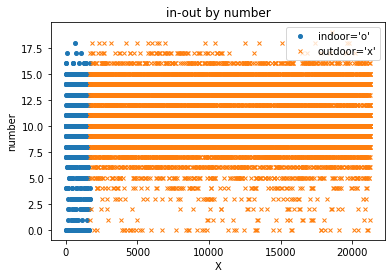

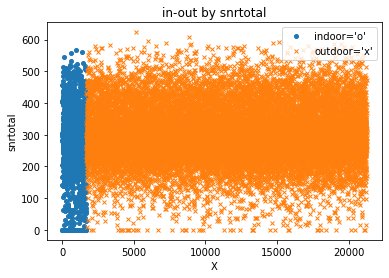

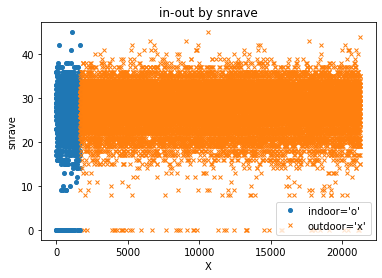

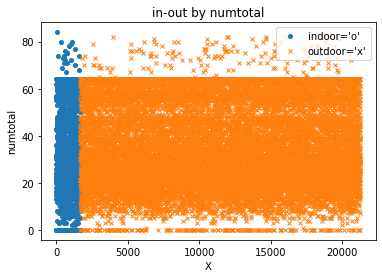

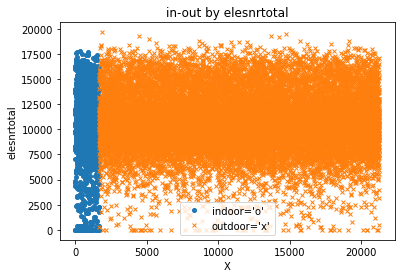

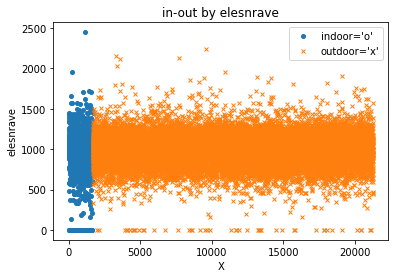

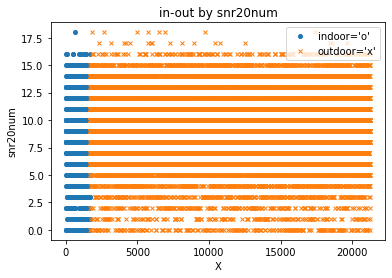

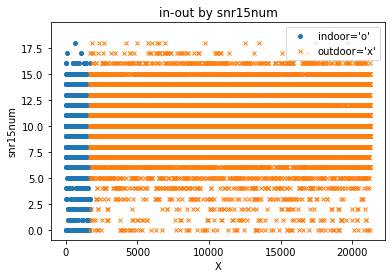

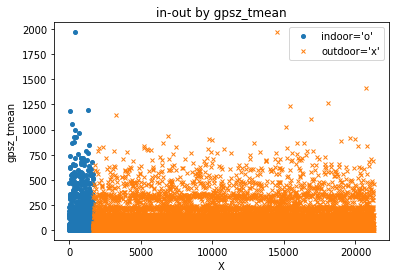

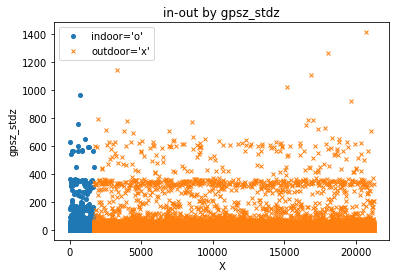

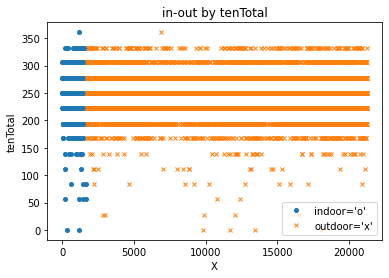

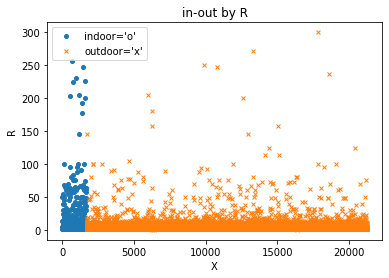

In [ ]:
for i in range(12):
  draw_graph_update(convert_to_int(log_dataxy04, 1), cols[i]) # convert_to_int(dataxy_sub05)

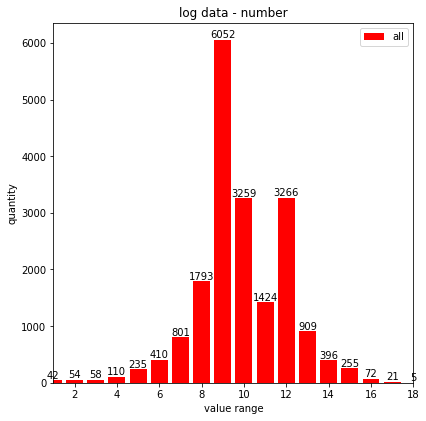

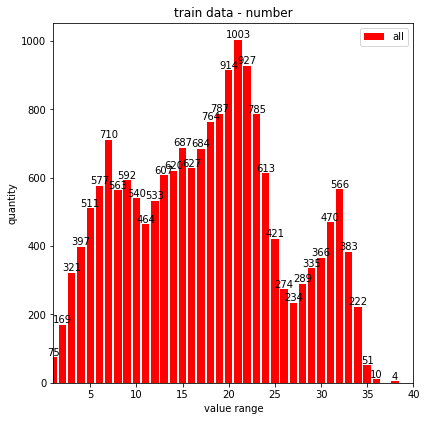

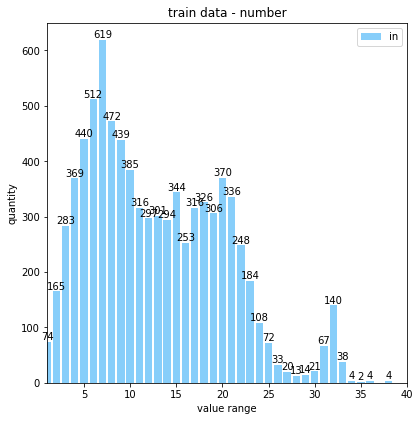

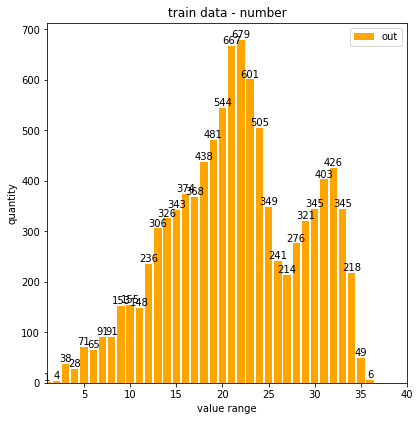

In [ ]:
draw_bar(convert_to_int(log_dataxy01, 1), cols, 0, "log data", 1, 18, 'r')

ttl = "train data"
# dataxy2
# dataxy_sub05

tmp = convert_to_int(dataxy_sub05)
draw_bar(tmp, cols, 0, ttl, 1, 40, 'r', 1, 1, 1)

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="indoor"]
draw_bar(tmp, cols, 0, ttl, 1, 40, 'i', 1, 1, 1)

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="outdoor"]
draw_bar(tmp, cols, 0, ttl, 1, 40, 'o', 1, 1, 1)
print()

45 0


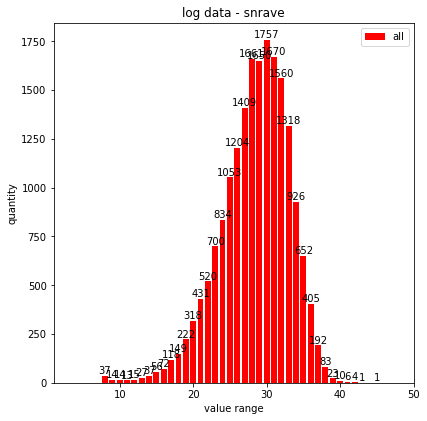

39 7


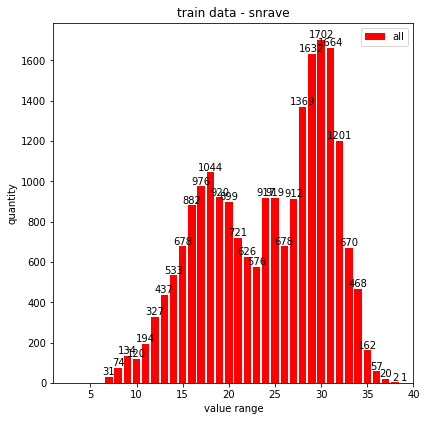

39 7


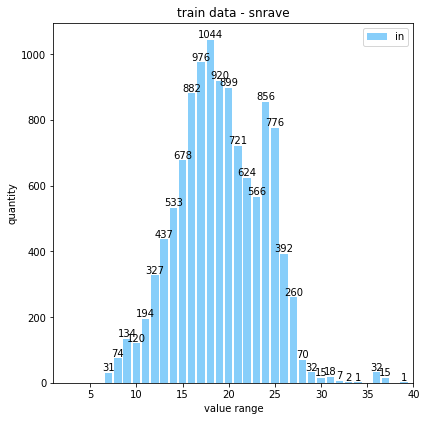

38 22


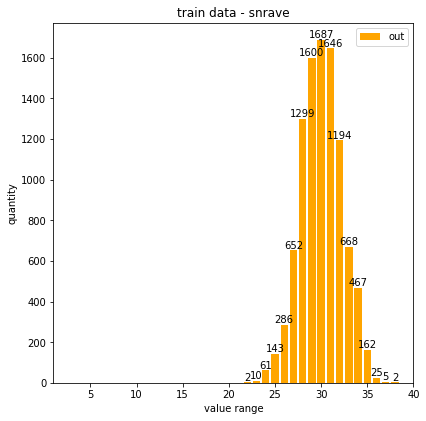

In [ ]:
ft = 2

# dataxy2
# dataxy_sub05

tmp = convert_to_int(log_dataxy01, 1)
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
dic = draw_bar(tmp, cols, ft, "log data", 1, 50, 'r')
#dic = sorted(dic.items(), key=lambda x: x[0], reverse=True) 
#print(dic)

tmp = convert_to_int(dataxy_sub05)
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 40, 'r')

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="indoor"]
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 40, 'i')

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="outdoor"]
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 40, 'o')
print()

81 0


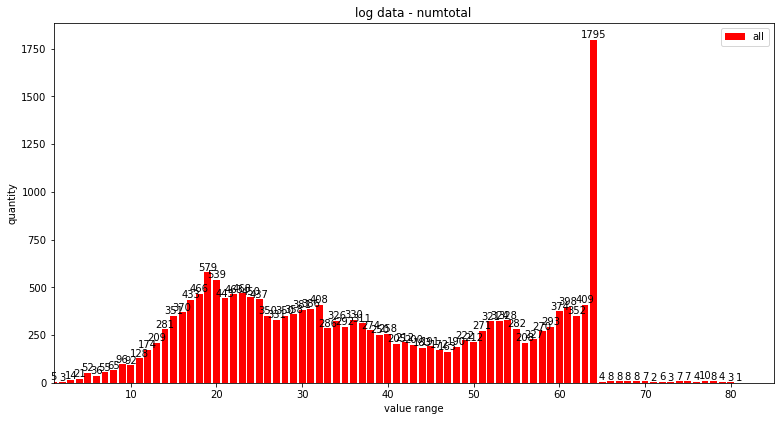

[(81, 1), (80, 3), (79, 4), (78, 8), (77, 10), (76, 4), (75, 7), (74, 7), (73, 3), (72, 6), (71, 2), (70, 7), (69, 8), (68, 8), (67, 8), (66, 8), (65, 4), (64, 1795), (63, 409), (62, 352), (61, 398), (60, 374), (59, 293), (58, 270), (57, 227), (56, 208), (55, 282), (54, 328), (53, 324), (52, 321), (51, 271), (50, 212), (49, 222), (48, 190), (47, 163), (46, 172), (45, 191), (44, 183), (43, 200), (42, 212), (41, 205), (40, 258), (39, 250), (38, 274), (37, 311), (36, 330), (35, 292), (34, 326), (33, 286), (32, 408), (31, 386), (30, 381), (29, 358), (28, 350), (27, 331), (26, 350), (25, 437), (24, 450), (23, 468), (22, 463), (21, 443), (20, 539), (19, 579), (18, 466), (17, 433), (16, 370), (15, 351), (14, 281), (13, 209), (12, 174), (11, 128), (10, 92), (9, 96), (8, 65), (7, 55), (6, 36), (5, 52), (4, 21), (3, 14), (2, 3), (1, 5), (0, 216)]
43 1


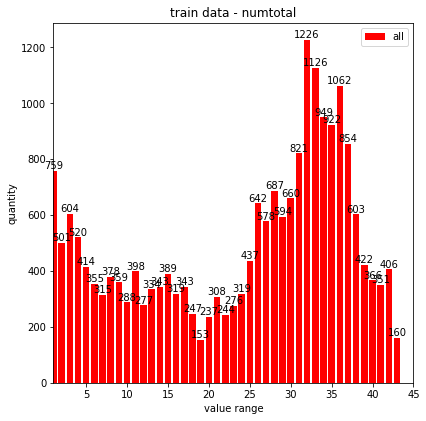

38 1


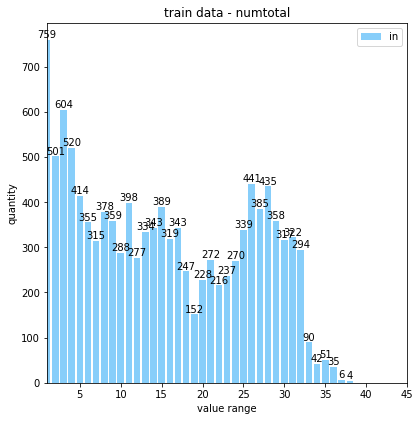

43 19


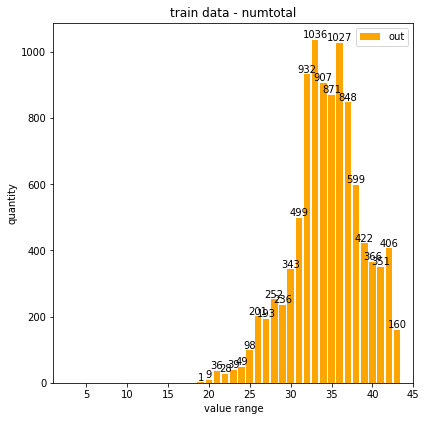

In [ ]:
ft = 3

# dataxy2
# dataxy_sub05

tmp = convert_to_int(log_dataxy01, 1)
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
dic = draw_bar(tmp, cols, ft, "log data", 1, 85, 'r', 2, 1)
dic = sorted(dic.items(), key=lambda x: x[0], reverse=True) 
print(dic)

tmp = convert_to_int(dataxy_sub05)
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 45, 'r')

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="indoor"]
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 45, 'i')

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="outdoor"]
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 45, 'o')
print()

18 0


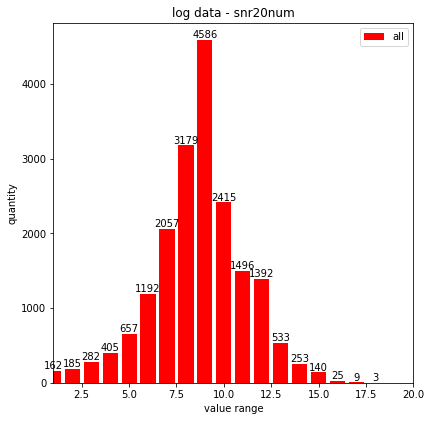

[(18, 3), (17, 9), (16, 25), (15, 140), (14, 253), (13, 533), (12, 1392), (11, 1496), (10, 2415), (9, 4586), (8, 3179), (7, 2057), (6, 1192), (5, 657), (4, 405), (3, 282), (2, 185), (1, 162), (0, 266)]
43 0


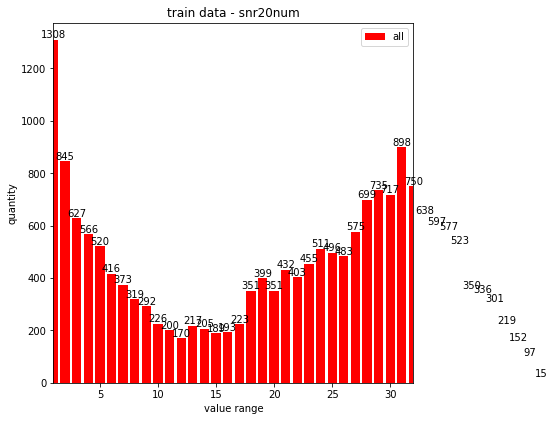

34 0


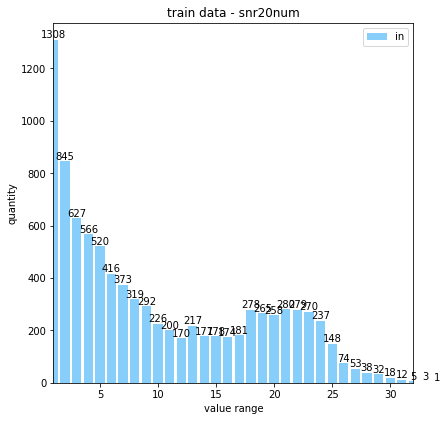

43 14


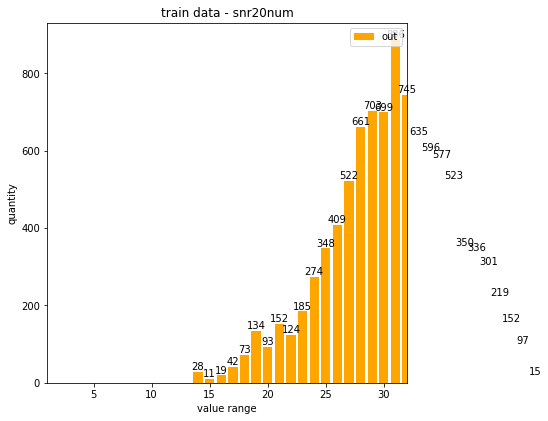

In [ ]:
ft = 6

# dataxy2
# dataxy_sub05

tmp = convert_to_int(log_dataxy01, 1)
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
dic = draw_bar(tmp, cols, ft, "log data", 1, 20, 'r', 1, 1)
dic = sorted(dic.items(), key=lambda x: x[0], reverse=True) 
print(dic)

tmp = convert_to_int(dataxy_sub05)
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 32, 'r')

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="indoor"]
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 32, 'i')

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="outdoor"]
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 32, 'o')
print()

18 0


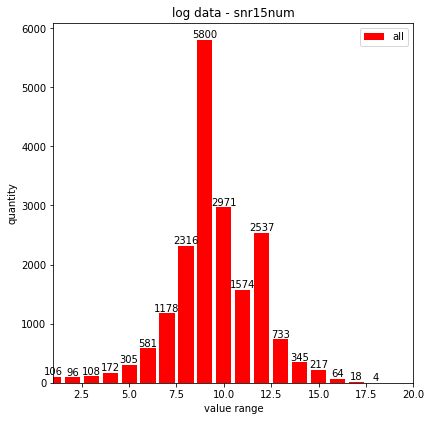

[(18, 4), (17, 18), (16, 64), (15, 217), (14, 345), (13, 733), (12, 2537), (11, 1574), (10, 2971), (9, 5800), (8, 2316), (7, 1178), (6, 581), (5, 305), (4, 172), (3, 108), (2, 96), (1, 106), (0, 112)]
43 0


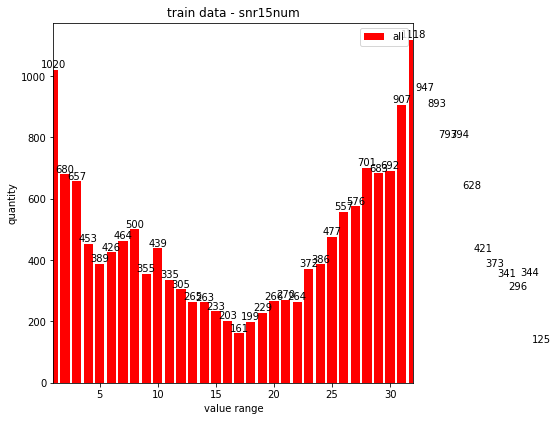

37 0


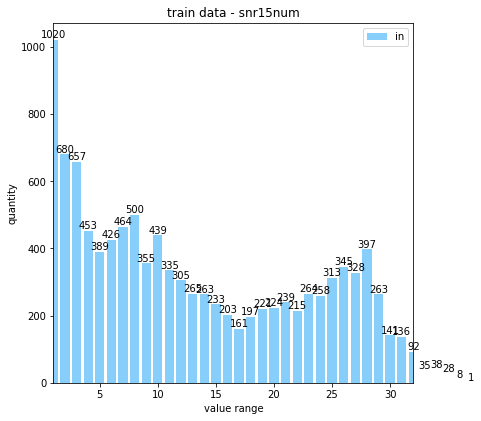

43 18


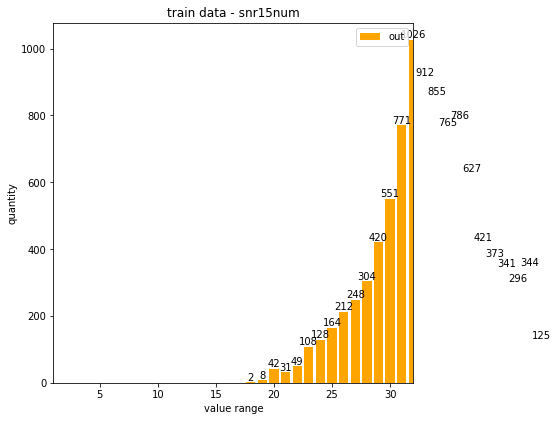

In [ ]:
ft = 7

# dataxy2
# dataxy_sub05

tmp = convert_to_int(log_dataxy01, 1)
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
dic = draw_bar(tmp, cols, ft, "log data", 1, 20, 'r', 1, 1)
dic = sorted(dic.items(), key=lambda x: x[0], reverse=True) 
print(dic)

tmp = convert_to_int(dataxy_sub05)
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 32, 'r')

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="indoor"]
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 32, 'i')

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="outdoor"]
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 32, 'o')
print()

361 0


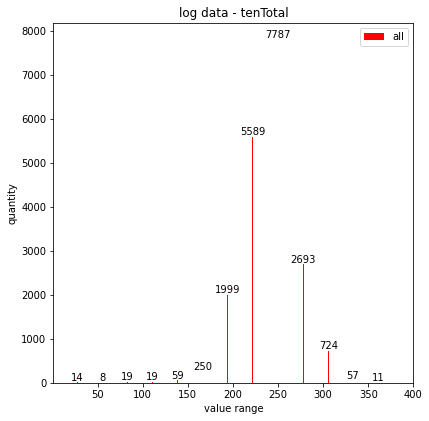

[(361, 11), (333, 57), (306, 724), (278, 2693), (250, 7787), (222, 5589), (194, 1999), (167, 250), (139, 59), (111, 19), (83, 19), (56, 8), (28, 14), (0, 8)]
780 0


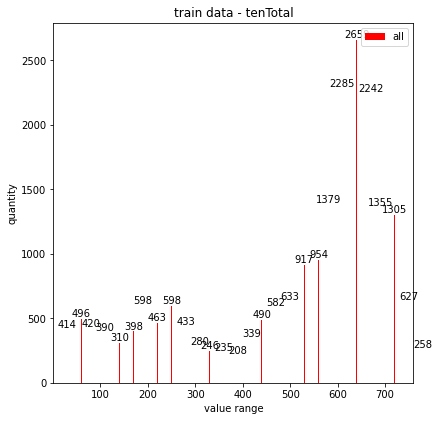

750 0


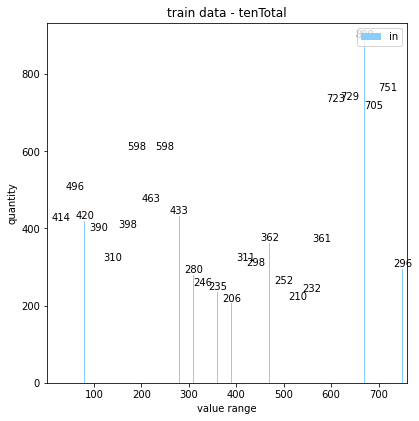

780 390


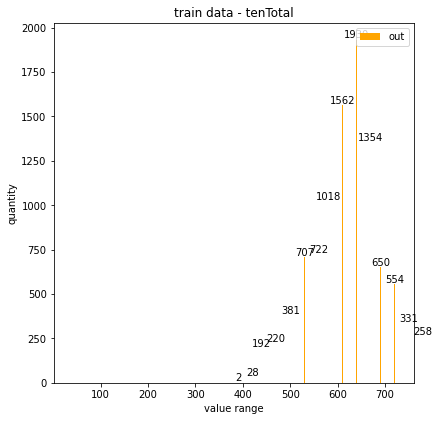

In [ ]:
ft = 10

# dataxy2
# dataxy_sub05

tmp = convert_to_int(log_dataxy01, 1)
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
dic = draw_bar(tmp, cols, ft, "log data", 1, 400, 'r', 1, 1)
dic = sorted(dic.items(), key=lambda x: x[0], reverse=True) 
print(dic)

tmp = convert_to_int(dataxy_sub05)
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 760, 'r')

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="indoor"]
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 760, 'i')

tmp = convert_to_int(dataxy_sub05)
tmp = tmp.loc[tmp["Class"]=="outdoor"]
print(max(tmp[cols[ft]]), min(tmp[cols[ft]]) )
draw_bar(tmp, cols, ft, "train data", 1, 760, 'o')
print()

In [ ]:
#
# query
  # ll_h, GPS海拔高度
  # ll_n, GPS卫星数
  # ll_r, GPS定位半径
  # ll, llx, lly
  # gnsf

# info
  # inout_flag
  # llx, lly, 
  # llr

# result
  # indoor


filepath = "./height_china.txt"
f = open(filepath,"r")
lns = f.readlines()
print(lns[:5])
search_table = {}
for ln in lns:
  ln = ln.strip()
  ps = ln.split("\t")
  k = ps[0]
  v1, v2 = ps[1], ps[2]
  search_table[k] = [v1, v2]
print(search_table['10000,2166'])


def preprocess(line, search_table):
  ps = line.split(",")
  inout = ps[-1]
  dic = {}
  for p in ps[:-1]:
    kv = p.split(":")
    dic[kv[0]] = kv[1]
  if inout == "0":
    dic["Class"] = "outdoor"
  elif inout == "1":
    dic["Class"] = "indoor"
  #
  row = {}
  
  
  #
  gpsh = float(dic['ll_h'])
  gpsx = float(dic['llx'])
  gpsy = float(dic['lly'])
  
  #
  ns = dic['gnsf'].split("|")
  print(dic['gnsf'])
  
  row['number'] = int(ns[2])
  row['snrtotal'] = int(ns[7])
  row['snrave'] = int(ns[6])
  row['numtotal'] = int(dic['ll_n'])
  row['elesnrtotal'] = int(ns[1])
  row['elesnrave'] = int(ns[0])
  row['snr20num'] = int(ns[5])
  row['snr15num'] = int(ns[4])
  row['gpsz_tmean'] = cal_gpsz_tmean(gpsx, gpsy, gpsh, search_table)
  row['gpsz_stdz'] = cal_gpsz_stdz(gpsx, gpsy, gpsh, search_table)
  row['tenTotal'] = int(ns[3])
  row['R'] = int(dic['ll_r'])
  #
  
  row["Class"]  = dic["Class"] 
  return row






['10000,2166\t632.253021\t13.930231\n', '10000,2167\t622.117305\t7.529098\n', '10000,2187\t1462.325000\t1.575000\n', '10000,2198\t1093.338095\t14.567298\n', '10000,2202\t1362.200000\t0.000000\n']
['632.253021', '13.930231']


In [ ]:
def parse_log(log_str):
  i1 = log_str.find("query[")
  i2 = log_str.find("info[")
  i3 = log_str.find("result[")
  #
  query_str = log_str[i1+6:i2]
  info_str = log_str[i2+5:i3]
  #print(query_str)
  #print(info_str)
  dic = {}
  for it in query_str.split("&"):
    if len(it)>0:
      ps = it.split("=")
      dic[ ps[0] ] = ps[1]
  #
  for it in info_str.split("&"):
    if len(it)>0:
      ps = it.split("=")
      dic[ ps[0] ] = ps[1]
  #print(dic)
  ss = ""
  try:
    #ss = ss + "ll_h:"+dic['ll_h']+","
    #ss = ss + "ll_n:"+dic['ll_n']+","
    #ss = ss + "ll_r:"+dic['ll_r']+","
    #ss = ss + "llx:"+dic['llx']+","
    #ss = ss + "lly:"+dic['lly']+","
    ss = ss + "gnsf:"+dic['gnsf']
  except:
    ss = ""
    #print(dic)
  return ss

f = open("对比02-百度地图-0820-BA座室外.txt","r") # st04.txt
lns = f.readlines()

rows_list = []
error_num = 0

# 
"""
elesnrave|elesnrtotal|gpsnumtotal|tenTotal|snr15num|snr20num|snrave|snrtotal，其中，所有字段都进行四舍五入取整处理，具体含义如下：
elesnrave——所有能检测到卫星的俯仰角和信噪比乘积的平均值
elesnrtotal——所有能检测到卫星的俯仰角和信噪比乘积的总和
gpsnumtotal——当前手机所能检测的所有GPS卫星数量（包括信号强度低的卫星）
tenTotal——将360°分为36份(10°)，包含卫星的份数总和与36之比（数据整数化处理乘以1000返回int值）
snrave——所有能检测到卫星的信噪比的平均值
snr15num——手机检测到信噪比大于等于15的卫星数量
snr20num——手机检测到信噪比大于等于20的卫星数量
snrtotal——所有能检测到卫星的信噪比总和
"""

for ln in lns[:-1]:
  line = ln.strip()
  #print(line)
  ss = parse_log(line)
  print(ss)
  try:
    row_tmp = preprocess(line, search_table)
    #print(len(row_tmp), row_tmp)
    rows_list.append(row_tmp)
  except:
    #print("error")
    error_num = error_num + 1


gnsf:-1
gnsf:-1
gnsf:1294|10348|8|222|8|8|35|278


gnsf:-1
gnsf:1206|15677|13|222|13|12|31|402
gnsf:1274|16556|13|194|13|13|33|429
gnsf:1294|15525|12|194|10|10|30|355
gnsf:1294|16825|13|222|13|12|30|391
gnsf:-1


In [ ]:
import pandas as pd

log_df = pd.DataFrame(rows_list)
print(error_num, len(log_df))
log_df
#log_df.to_csv("log_data04.csv", index=False)

119 0


""


In [ ]:
log_df.shape
log_df

,number,snrtotal,snrave,numtotal,elesnrtotal,elesnrave,snr20num,snr15num,gpsz_tmean,gpsz_stdz,tenTotal,R,Class
0,10,228,23,32,8562,856,8,9,80.45,15.73,278,2,outdoor
1,10,245,25,20,8705,871,9,10,2.67,0.20,278,4,outdoor
2,13,353,27,32,12047,927,12,12,27.73,27.73,250,19,outdoor
3,9,252,28,36,8938,993,8,9,37.55,7.34,250,1,outdoor
4,10,203,20,19,7662,766,5,10,1.85,0.43,250,6,outdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21259,10,247,25,32,7525,753,9,10,60.75,6.97,222,9,outdoor
21260,11,305,28,9,12059,1096,10,11,3.56,0.89,194,12,outdoor
21261,0,0,0,0,0,0,0,0,182.00,182.00,222,60,outdoor
21262,14,381,27,62,14362,1026,10,13,2.13,0.74,222,2,outdoor


In [ ]:
print('hello world')
#
def parse_data(ln):
  dic = {}
  ps = ln.strip().split("&")
  for p in ps:
    tmp = p.split("=")
    if len(tmp)==2:
      dic[tmp[0]] = tmp[1]
  return dic

def process_detail_col(details):
  ele, prp, snr, use = [], [], [], []
  ds = details.strip().split("|")
  for d in ds:
    d = d.strip()
    if d=="":
      continue
    tmp = process_detail(d)
    ele.append(tmp[0])
    prp.append(tmp[1])
    snr.append(tmp[2])
    use.append(tmp[3])
  return ele, prp, snr, use

def process_detail(detail):
  ps = detail.split(":")
  ele = ps[0] # ele 俯仰角
  prp = ps[1] # azimuth 方位角
              # 2 - prp, PRN (pseudo-random number) for the satellite.
  snr = ps[3] # snr信噪比
  use = ps[6] # use-in-fix(是否用到该卫星), 0: 表示没有用到, 1: 表示用到
  return ele, prp, snr, use

# 对于扫描到的GPS列表，扫描到所有snr信噪比大于0的卫星总数
# return -> int
def cal_numtotal(snr):
  c = 0
  for v in snr:
    if float(v)>0:
      c = c + 1
  return c

# 对于扫描到的GPS列表，扫描到所有snr信噪比大于15的卫星总数
# return -> int
def cal_snr15num(snr):
  c = 0
  for v in snr:
    if float(v)>=15:
      c = c + 1
  return c

# 对于扫描到的GPS列表，扫描到所有snr信噪比大于20的卫星总数
# return -> int
def cal_snr20num(snr):
  c = 0
  for v in snr:
    if float(v)>=20:
      c = c + 1
  return c

# 对于扫描到的GPS列表，扫描到所有snr信噪比的总和
# return -> float
def cal_snrtotal(snr):
  s = 0
  for v in snr:
    s = s + float(v)
  return round(s, 2)

# 返回平均值
# return -> float
def cal_snrave(snr):
  s = cal_snrtotal(snr)
  n = cal_numtotal(snr)
  return round(s/n, 2)

# 对于扫描到的GPS列表，扫描到所有snr信噪比与ele俯仰角乘积的总和
# return -> float
def cal_elesnrtotal(ele, snr):
  s = 0
  i = 0 
  while i<len(ele):
    s = s + float(ele[i])*float(snr[i])
    i = i + 1
  return round(s, 2)

# 返回对于扫描到的GPS列表，扫描到所有snr信噪比与ele俯仰角乘积的总和/所有信噪比大于0的卫星总数的平均值
# return -> float
def cal_elesnrave(ele, snr):
  s = cal_elesnrtotal(ele, snr)
  n = cal_numtotal(snr)
  return round(s/n, 2)

# return -> int
def cal_number(use):
  c = 0
  for v in use:
    if v=="1":
      c = c + 1
  return c

import math

# 用来记录360°中每10°是否有卫星, 将方位角整除10向上取整,并将数值记录在num中, 所有36个数组中存在大于0数组的数量
# return -> float
def cal_tenTotal(prp):
  proportion_360 = 0
  # 用来记录360°中每10°是否有卫星
  num = []
  for i in range(37):
    num.append(0)
  #
  for v in prp:
    n = int(math.ceil( float(v)/10 ))
    num[n] = num[n] + 1
  #
  i = 1
  while i<=36:
    if num[i]>0:
      proportion_360 = proportion_360 + 1
    i = i + 1
  return round(proportion_360/36, 2) # 乘1000为了保证后面3位的精度返回int值, 

# return -> float
def cal_gpsz_tmean(gpsx, gpsy, gpsh, search_table):
  gpsx = float(gpsx)
  gpsy = float(gpsy)
  k = str(int(gpsx)*100) + "," +  str(int(gpsy)*100)
  phoneh = float(search_table[k][0])
  gpsh = float(gpsh)
  return round(abs(phoneh-gpsh), 2)

def cal_gpsz_stdz(gpsx, gpsy, gpsh, search_table):
  d = cal_gpsz_tmean(gpsx, gpsy, gpsh, search_table)
  gpsx = float(gpsx)
  gpsy = float(gpsy)
  k = str(int(gpsx)*100) + "," +  str(int(gpsy)*100)
  phoneh = float(search_table[k][1]) # ----------- 
  if phoneh<1:
    phoneh = 1
  return round(d/phoneh, 2)

hello world


In [ ]:
log_data_row = """
&collect_user=guihan&collect_time=2021-08-10 10:06:30&cuid=4F118FE95658DF4D638C699DDA87A3B9|YIVX7CQ6V&bdn=&bdf=&inout=1&cl_t=1628561190&cl=-1|-1|-1|-1&wf=66d8696654d9;41;|06696c8adcb6;76;&wf2=NOWIFI&wf_n=1&wf_mac=66d8696654d9&wf_ssid=han的iPhone&wf_st=1628561190&wf_et=1628561190&wf_vt=1628561190&wgs84_baidux=116.355083&wgs84_baiduy=40.069315&wgs84_baidur=86&baiducbt=1628561188&baidutype=161&gpsx=116.355084&gpsy=40.069094&gpsr=5.50&gpsn=22-29&gpss=0.00&gpsh=18.00&detail=26.90000:264.70001:2:21.10000:0:1:1|26.20000:45.10000:3:27.00000:0:1:0|14.10000:92.20000:4:25.10000:0:1:1|59.70000:282.79999:6:28.70000:0:1:1|11.60000:127.30000:9:26.10000:0:1:1|14.40000:320.70001:12:22.90000:0:1:0|29.00000:176.89999:14:17.10000:0:1:1|63.70000:88.00000:17:24.80000:0:1:1|74.80000:8.40000:19:31.30000:0:1:1|7.50000:41.30000:22:20.30000:0:1:0|44.10000:94.70000:67:27.50000:0:1:1|22.60000:153.30000:68:24.20000:0:1:1|25.30000:227.39999:80:19.20000:0:1:1|48.90000:41.80000:82:29.30000:0:1:1|47.80000:321.70001:83:19.80000:0:1:1|33.60000:137.00000:193:26.60000:0:1:1|17.30000:169.60001:194:23.70000:0:1:0|67.00000:96.00000:195:28.00000:0:1:1|42.30000:163.70000:199:29.20000:0:1:1|49.30000:175.50000:207:25.40000:0:1:1|74.10000:284.00000:208:20.40000:0:1:1|64.70000:211.39999:210:26.40000:0:1:1|51.30000:251.00000:213:23.40000:0:1:1|16.50000:179.50000:220:18.20000:0:1:0|37.40000:84.80000:227:27.10000:0:1:1|25.10000:293.89999:229:26.40000:0:1:1|70.80000:352.10001:230:21.70000:0:1:0|48.20000:125.60000:232:27.70000:0:1:0|22.90000:245.89999:236:23.40000:0:1:1|&user_action=COLLECT&wgs84_realx=116.355144&wgs84_realy=40.069098&coord=wgs84&cmode=StartEndPoint
"""

f = open("对比02-采集工具-0820-BA座室外.txt","r") # st04.txt
lns = f.readlines()

#
records = {'elesnrave':[], 'elesnrtotal':[], 'numtotal':[], 'tenTotal':[], 'snr15num':[], 'snr20num':[], 'snrave':[], 'snrtotal':[]}

for ln in lns[:]:
  dic = parse_data(ln)
  #print(dic)
  if "detail" not in dic:
    continue
  details = dic['detail']
  ele, prp, snr, use = process_detail_col(details)
  # elesnrave|elesnrtotal|gpsnumtotal|tenTotal|snr15num|snr20num|snrave|snrtotal
  #print(cal_elesnrave(ele, snr), end="|")
  records['elesnrave'].append( cal_elesnrave(ele, snr) )
  #print(cal_elesnrtotal(ele, snr), end="|")
  records['elesnrtotal'].append( cal_elesnrtotal(ele, snr) )
  #print(cal_numtotal(snr), end="|")
  records['numtotal'].append( cal_numtotal(snr) )
  #print(cal_tenTotal(prp)*1000, end="|")
  records['tenTotal'].append( cal_tenTotal(prp)*1000 )
  #print(cal_snr15num(snr), end="|")
  records['snr15num'].append( cal_snr15num(snr) )
  #print(cal_snr20num(snr), end="|")
  records['snr20num'].append( cal_snr20num(snr) )
  #print(cal_snrave(snr), end="|")
  records['snrave'].append( cal_snrave(snr) )
  #print(cal_snrtotal(snr))
  records['snrtotal'].append( cal_snrtotal(snr) )
  #print(cal_number(use))
  
#


elesnrave 255


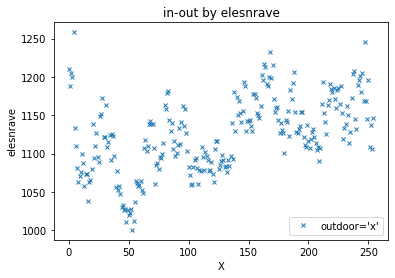

elesnrtotal 255


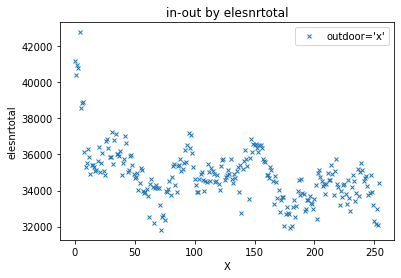

numtotal 255


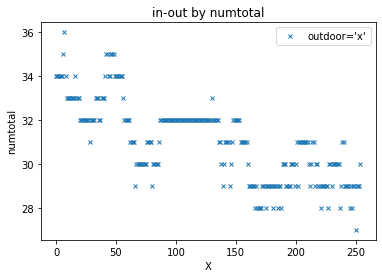

tenTotal 255


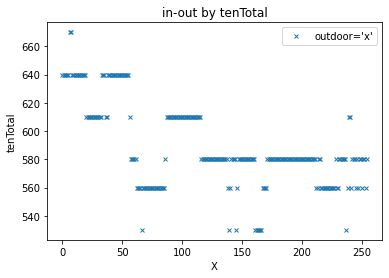

snr15num 255


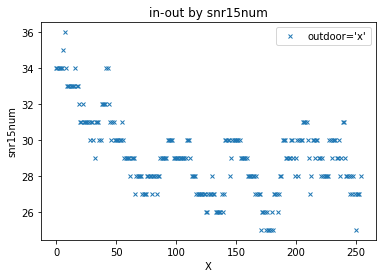

snr20num 255


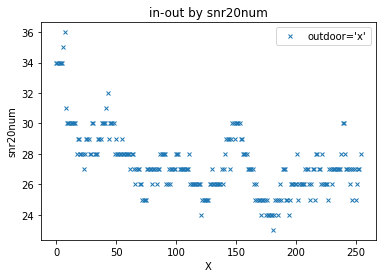

snrave 255


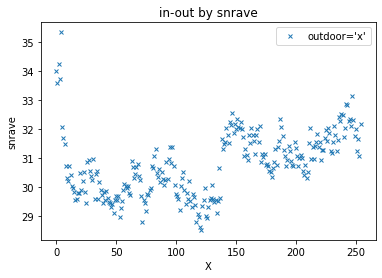

snrtotal 255


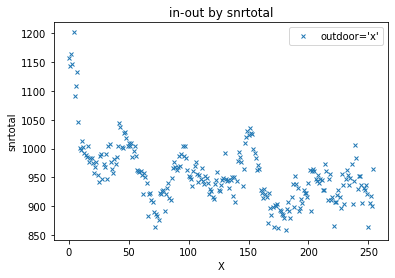

In [ ]:

#
import matplotlib.pyplot as plt

def draw_graph01(k, v, mks=['o', 'x']):
  division = 0
  x = []
  y = []
  i = 0
  while i<len(v):
    x.append(i)
    y.append(v[i])
    i = i + 1
  #plt.plot(x[:division], y[:division], mks[0], label="indoor='{0}'".format(mks[0]), markersize=4) #color=cs[0],
  plt.plot(x[division:], y[division:], mks[1], label="outdoor='{0}'".format(mks[1]), markersize=4) # color=cs[1], 
  plt.legend(numpoints=1)
  plt.xlabel('X')
  plt.ylabel(k) 
  plt.title("in-out by " + k)
  plt.show()

  return 

for k, v in records.items():
  print(k, len(v))
  draw_graph01(k, v)

In [ ]:

for v in prp:
  print(float(v), end="f, ")
print()
i0 = [264.70001, 45.1, 92.2, 282.79999, 127.3, 320.70001, 176.89999, 88.0, 8.4, 41.3, 94.7, 153.3, 227.39999, 41.8, 321.70001, 137.0, 169.60001, 96.0, 163.7, 175.5, 284.0, 211.39999, 251.0, 179.5, 84.8, 293.89999, 352.10001, 125.6, 245.89999]
print(len(i0))
print()

#
for v in ele:
  print(float(v), end="f, ")
print()
i0 = [264.70001, 45.1, 92.2, 282.79999, 127.3, 320.70001, 176.89999, 88.0, 8.4, 41.3, 94.7, 153.3, 227.39999, 41.8, 321.70001, 137.0, 169.60001, 96.0, 163.7, 175.5, 284.0, 211.39999, 251.0, 179.5, 84.8, 293.89999, 352.10001, 125.6, 245.89999]
print(len(i0))
print()

#
for v in snr:
  print(float(v), end="f, ")
print()
i0 = [264.70001, 45.1, 92.2, 282.79999, 127.3, 320.70001, 176.89999, 88.0, 8.4, 41.3, 94.7, 153.3, 227.39999, 41.8, 321.70001, 137.0, 169.60001, 96.0, 163.7, 175.5, 284.0, 211.39999, 251.0, 179.5, 84.8, 293.89999, 352.10001, 125.6, 245.89999]
print(len(i0))
